In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
dt=pd.read_csv('train.csv')
dv=pd.read_csv('test.csv')

In [3]:
dt

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [4]:
dt.drop('Vehicle_Age',axis=1,inplace=True)

In [5]:
print(dt.isnull().sum())
print(dv.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

obj_col_t=[col for col in dt.columns if dt[col].dtype=='object']
obj_col_v=[col for col in dv.columns if dv[col].dtype=='object']
print(obj_col_t)

['Gender', 'Vehicle_Damage']


In [7]:
le=LabelEncoder()
dt['Gender']=le.fit_transform(dt['Gender'].values)
dt['Vehicle_Damage']=le.fit_transform(dt['Vehicle_Damage'].values)
dv['Vehicle_Damage']=le.fit_transform(dv['Vehicle_Damage'].values)
dv['Gender']=le.fit_transform(dv['Gender'].values)

In [8]:
dt

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,1,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,1,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,0,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,1,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,0,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,1,48,1,6.0,0,1,27412.0,26.0,218,0
11504794,11504794,0,26,1,36.0,0,1,29509.0,152.0,115,1
11504795,11504795,0,29,1,32.0,1,0,2630.0,152.0,189,0
11504796,11504796,0,51,1,28.0,0,1,48443.0,26.0,274,1


In [9]:
dv.drop('Vehicle_Age',axis=1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,0,20,1,47.0,0,0,2630.0,160.0,228
1,11504799,1,47,1,28.0,0,1,37483.0,124.0,123
2,11504800,1,47,1,43.0,0,1,2630.0,26.0,271
3,11504801,0,22,1,47.0,1,0,24502.0,152.0,115
4,11504802,1,51,1,19.0,0,0,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,1,57,1,28.0,0,1,51661.0,124.0,109
7669862,19174660,1,28,1,50.0,1,0,25651.0,152.0,184
7669863,19174661,1,47,1,33.0,1,0,2630.0,138.0,63
7669864,19174662,1,30,1,28.0,0,1,38866.0,124.0,119


In [10]:
dt.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,5.413510e-01,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,5.026798e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,4.982872e-01,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,4.999928e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,1.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


<Axes: >

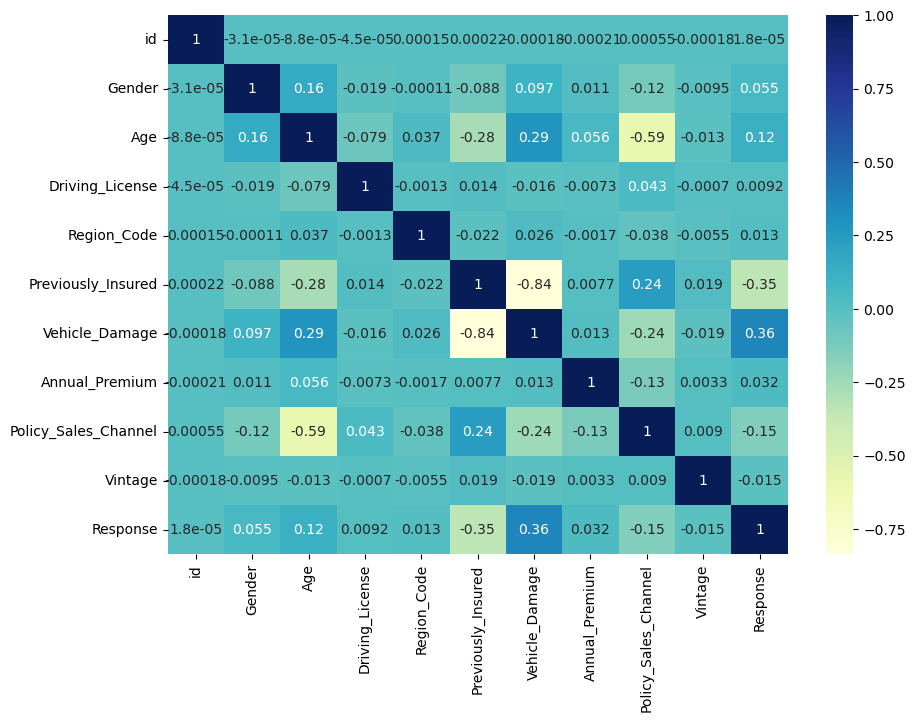

In [11]:
fig=plt.figure(figsize=(10,7))

sns.heatmap(data=dt.corr(),annot=True,cmap='YlGnBu')

In [12]:
feature=dt.iloc[:,1:10].values

In [13]:
y=dt.iloc[:,-1].values

In [14]:
x_train,x_test,y_train,y_test=train_test_split(feature,y,train_size=0.8,test_size=0.2)

In [15]:
from sklearn.metrics import classification_report,accuracy_score

In [16]:
def models(x_train,y_train):
    LG=LogisticRegression(random_state=0)
    RF=RandomForestClassifier(n_estimators=10,random_state=0)
    DT=DecisionTreeClassifier(random_state=0)


    LG.fit(x_train,y_train)
    RF.fit(x_train,y_train)
    DT.fit(x_train,y_train)

    print('1. Accuracy Score LG',LG.score(x_train,y_train))
    print('2. Accuracy Score RF',RF.score(x_train,y_train))
    print('3. Accuracy Score DT',DT.score(x_train,y_train))

    return LG,RF,DT

In [17]:
model=models(x_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1. Accuracy Score LG 0.8742281209208593
2. Accuracy Score RF 0.9852569113015679
3. Accuracy Score DT 0.998639263316021


In [18]:
model

(LogisticRegression(random_state=0),
 RandomForestClassifier(n_estimators=10, random_state=0),
 DecisionTreeClassifier(random_state=0))

In [19]:
for i in model:
    print('Model', i)
    y_pred = i.predict(x_test)
    print(classification_report(y_test, y_pred))
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('-----' * 10)

Model LogisticRegression(random_state=0)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93   2018047
           1       0.28      0.01      0.03    282913

    accuracy                           0.87   2300960
   macro avg       0.58      0.50      0.48   2300960
weighted avg       0.80      0.87      0.82   2300960

Accuracy Score: 0.8741494854321674
--------------------------------------------------
Model RandomForestClassifier(n_estimators=10, random_state=0)
              precision    recall  f1-score   support

           0       0.89      0.96      0.92   2018047
           1       0.38      0.20      0.26    282913

    accuracy                           0.86   2300960
   macro avg       0.64      0.58      0.59   2300960
weighted avg       0.83      0.86      0.84   2300960

Accuracy Score: 0.8622205514220151
--------------------------------------------------
Model DecisionTreeClassifier(random_state=0)
              precision   

In [20]:
dv.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [21]:
dt.iloc[:,1:10]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,21,1,35.0,0,1,65101.0,124.0,187
1,1,43,1,28.0,0,1,58911.0,26.0,288
2,0,25,1,14.0,1,0,38043.0,152.0,254
3,0,35,1,1.0,0,1,2630.0,156.0,76
4,0,36,1,15.0,1,0,31951.0,152.0,294
...,...,...,...,...,...,...,...,...,...
11504793,1,48,1,6.0,0,1,27412.0,26.0,218
11504794,0,26,1,36.0,0,1,29509.0,152.0,115
11504795,0,29,1,32.0,1,0,2630.0,152.0,189
11504796,0,51,1,28.0,0,1,48443.0,26.0,274


In [22]:
dv

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,0,20,1,47.0,0,< 1 Year,0,2630.0,160.0,228
1,11504799,1,47,1,28.0,0,1-2 Year,1,37483.0,124.0,123
2,11504800,1,47,1,43.0,0,1-2 Year,1,2630.0,26.0,271
3,11504801,0,22,1,47.0,1,< 1 Year,0,24502.0,152.0,115
4,11504802,1,51,1,19.0,0,1-2 Year,0,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,1,57,1,28.0,0,1-2 Year,1,51661.0,124.0,109
7669862,19174660,1,28,1,50.0,1,< 1 Year,0,25651.0,152.0,184
7669863,19174661,1,47,1,33.0,1,1-2 Year,0,2630.0,138.0,63
7669864,19174662,1,30,1,28.0,0,< 1 Year,1,38866.0,124.0,119


In [23]:
dv.drop('Vehicle_Age',axis=1,inplace=True)

In [24]:
test_data=dv.iloc[:,1:]

In [25]:
test_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,20,1,47.0,0,0,2630.0,160.0,228
1,1,47,1,28.0,0,1,37483.0,124.0,123
2,1,47,1,43.0,0,1,2630.0,26.0,271
3,0,22,1,47.0,1,0,24502.0,152.0,115
4,1,51,1,19.0,0,0,34115.0,124.0,148


In [26]:
prediction=model[1].predict(test_data)
print(dv['id'],prediction)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0          11504798
1          11504799
2          11504800
3          11504801
4          11504802
             ...   
7669861    19174659
7669862    19174660
7669863    19174661
7669864    19174662
7669865    19174663
Name: id, Length: 7669866, dtype: int64 [0 0 0 ... 0 0 0]


In [27]:
a=pd.DataFrame(prediction)

In [28]:
a.head()

,0
0,0
1,0
2,0
3,0
4,0


In [32]:
output = pd.DataFrame({
    'id': dv['id'],
    'prediction': prediction
})

In [33]:
output

,id,prediction
0,11504798,0
1,11504799,0
2,11504800,0
3,11504801,0
4,11504802,0
...,...,...
7669861,19174659,0
7669862,19174660,0
7669863,19174661,0
7669864,19174662,0


In [36]:
output.to_csv('submission.csv', index=False)